In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from pandas_profiling import ProfileReport
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [4]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime","Water_Height", "Power_P1", "Power_P2", "Outflow"]

In [5]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [15]:
# Read in the data PST
pump = "PST238"
year = "2021"
month = "Januar"

pump = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [16]:
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST238")


In [17]:
pump

,DateTime,Water_Height,Power_P1,Power_P2,Outflow,Volume
0,2021-01-01 00:00:00,0.96,0.0,0.0,0.0,435.500140
1,2021-01-01 00:05:00,0.97,0.0,0.0,0.0,440.036600
2,2021-01-01 00:05:30,0.96,0.0,0.0,0.0,435.500140
3,2021-01-01 00:06:00,0.97,0.0,0.0,0.0,440.036600
4,2021-01-01 00:10:30,0.98,0.0,0.0,0.0,444.573060
...,...,...,...,...,...,...
29445,2021-01-31 23:42:00,0.56,0.0,0.0,0.0,254.041748
29446,2021-01-31 23:46:30,0.57,0.0,0.0,0.0,258.578208
29447,2021-01-31 23:53:30,0.58,0.0,0.0,0.0,263.114668
29448,2021-01-31 23:54:30,0.57,0.0,0.0,0.0,258.578208


# Pumps plotted vs Outflow
Outflow seems to fluctuate quite a lot even tough the pump stays constant

Text(0.5, 0, 'Time')

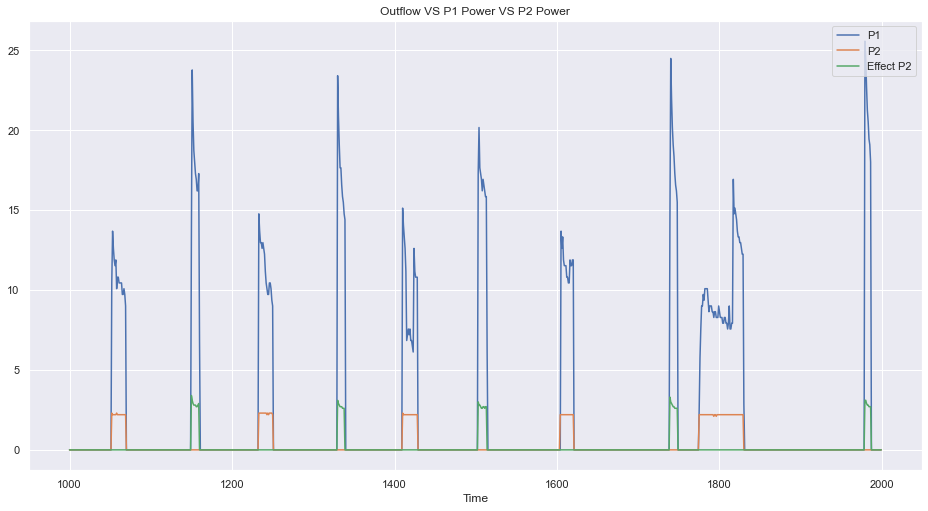

In [7]:
fig, ax = plt.subplots()
pump.Outflow[1000:2000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1000:2000].plot()
pump["Power_P2"][1000:2000].plot()
# pump["Outflow"][1000:2000].plot()
ax.legend(["P1", "P2", "Effect P2", "Effect P1"], loc="upper right")
ax.set_xlabel("Time")

# Water Height and Outflow looks alright. 

Text(0.5, 0, 'Time')

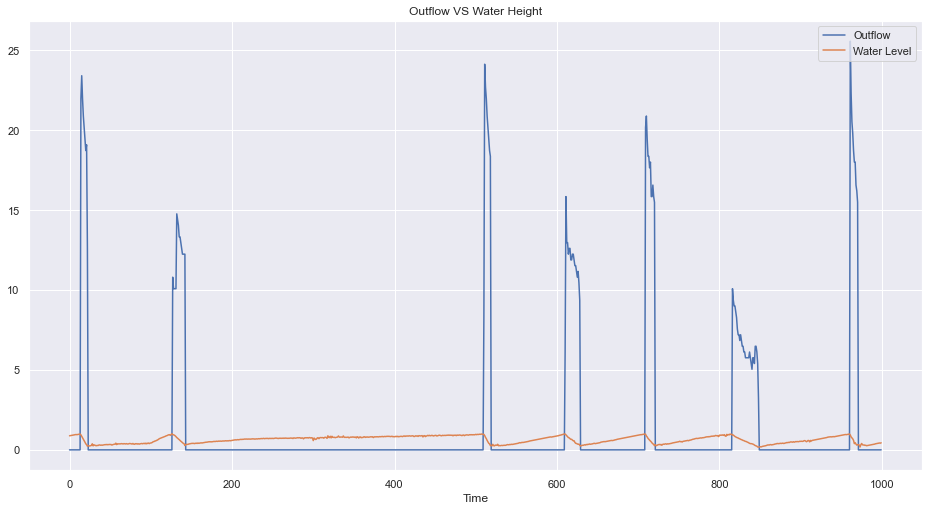

In [8]:
fig, ax = plt.subplots()
pump.Outflow[0:1000].plot(title="Outflow VS Water Height")
pump.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Level"], loc="upper right")
ax.set_xlabel("Time")


In [9]:
profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


array([[<AxesSubplot:title={'center':'Power_P1'}>]], dtype=object)

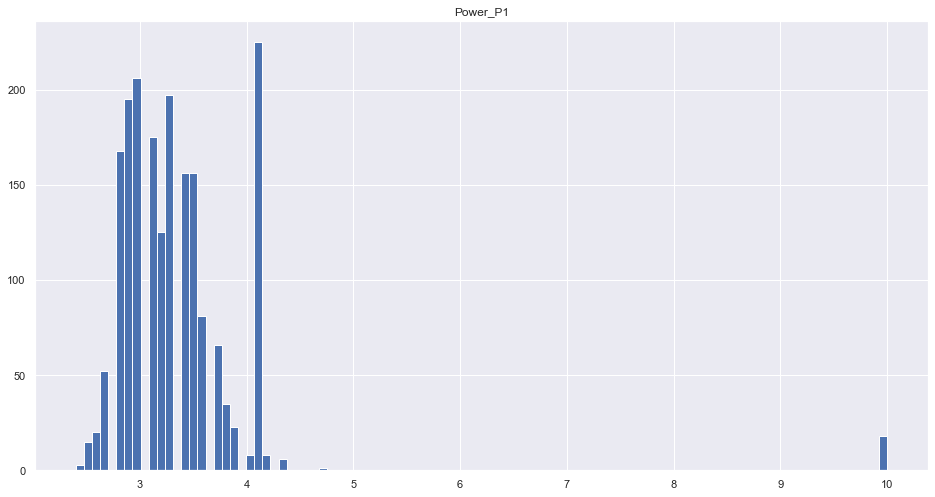

In [20]:
pump[(pump.Power_P1 > 0.5) & (pump.Power_P1 < 20)].hist(column="Power_P1", bins=100)

array([[<AxesSubplot:title={'center':'Power_P2'}>]], dtype=object)

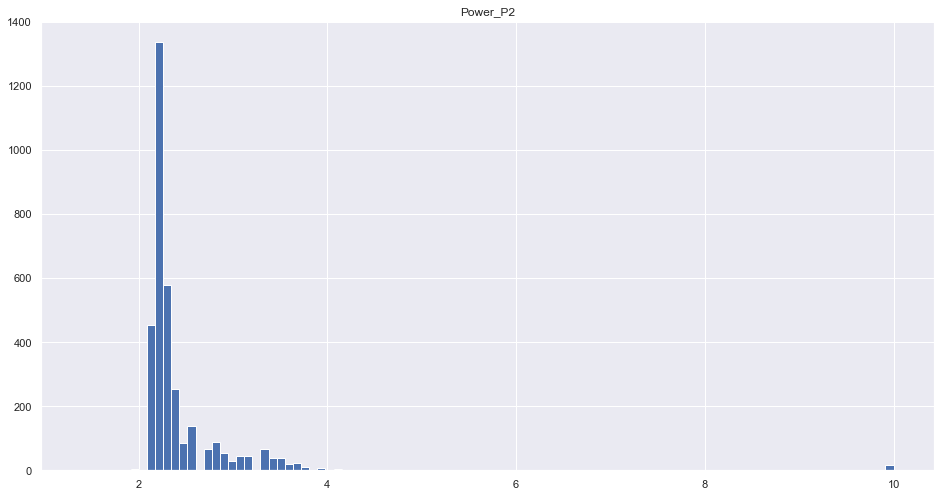

In [21]:
pump[(pump.Power_P2 > 0.5) & (pump.Power_P2 < 20)].hist(column="Power_P2", bins=100)

array([[<AxesSubplot:title={'center':'Outflow'}>]], dtype=object)

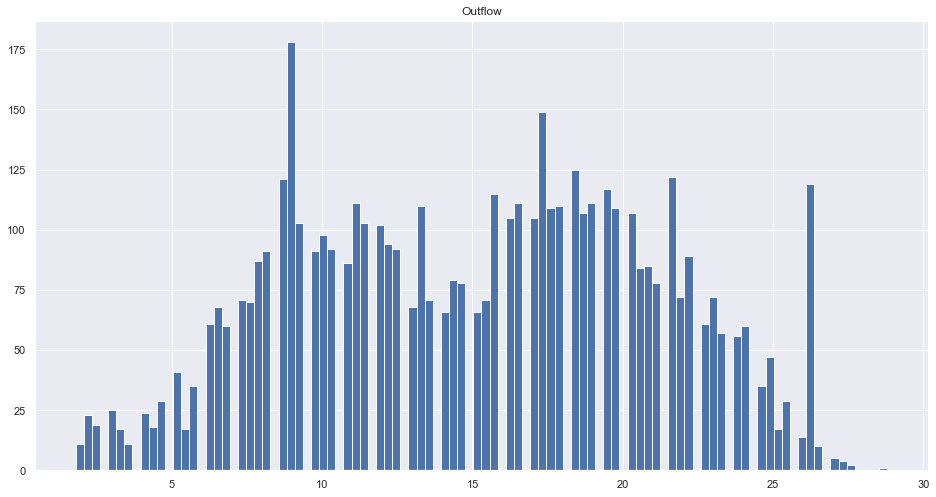

In [22]:
pump[(pump.Outflow > 0.5) & (pump.Outflow < 100)].hist(column="Outflow", bins=100)

In [26]:
pump

,DateTime,Water_Height,Power_P1,Power_P2,Outflow,Volume
0,2021-01-01 00:00:00,0.96,0.0,0.0,0.0,435.500140
1,2021-01-01 00:05:00,0.97,0.0,0.0,0.0,440.036600
2,2021-01-01 00:05:30,0.96,0.0,0.0,0.0,435.500140
3,2021-01-01 00:06:00,0.97,0.0,0.0,0.0,440.036600
4,2021-01-01 00:10:30,0.98,0.0,0.0,0.0,444.573060
...,...,...,...,...,...,...
29445,2021-01-31 23:42:00,0.56,0.0,0.0,0.0,254.041748
29446,2021-01-31 23:46:30,0.57,0.0,0.0,0.0,258.578208
29447,2021-01-31 23:53:30,0.58,0.0,0.0,0.0,263.114668
29448,2021-01-31 23:54:30,0.57,0.0,0.0,0.0,258.578208
